<a href="https://colab.research.google.com/github/dgadela/ML_HandsOn/blob/master/wineQualityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score LR 0.8825
Accuracy Score KNN 0.89
Accuracy Score SVM 0.9175
Accuracy Score RF 0.9125
Accuracy Score GB 0.89


<Figure size 720x432 with 0 Axes>

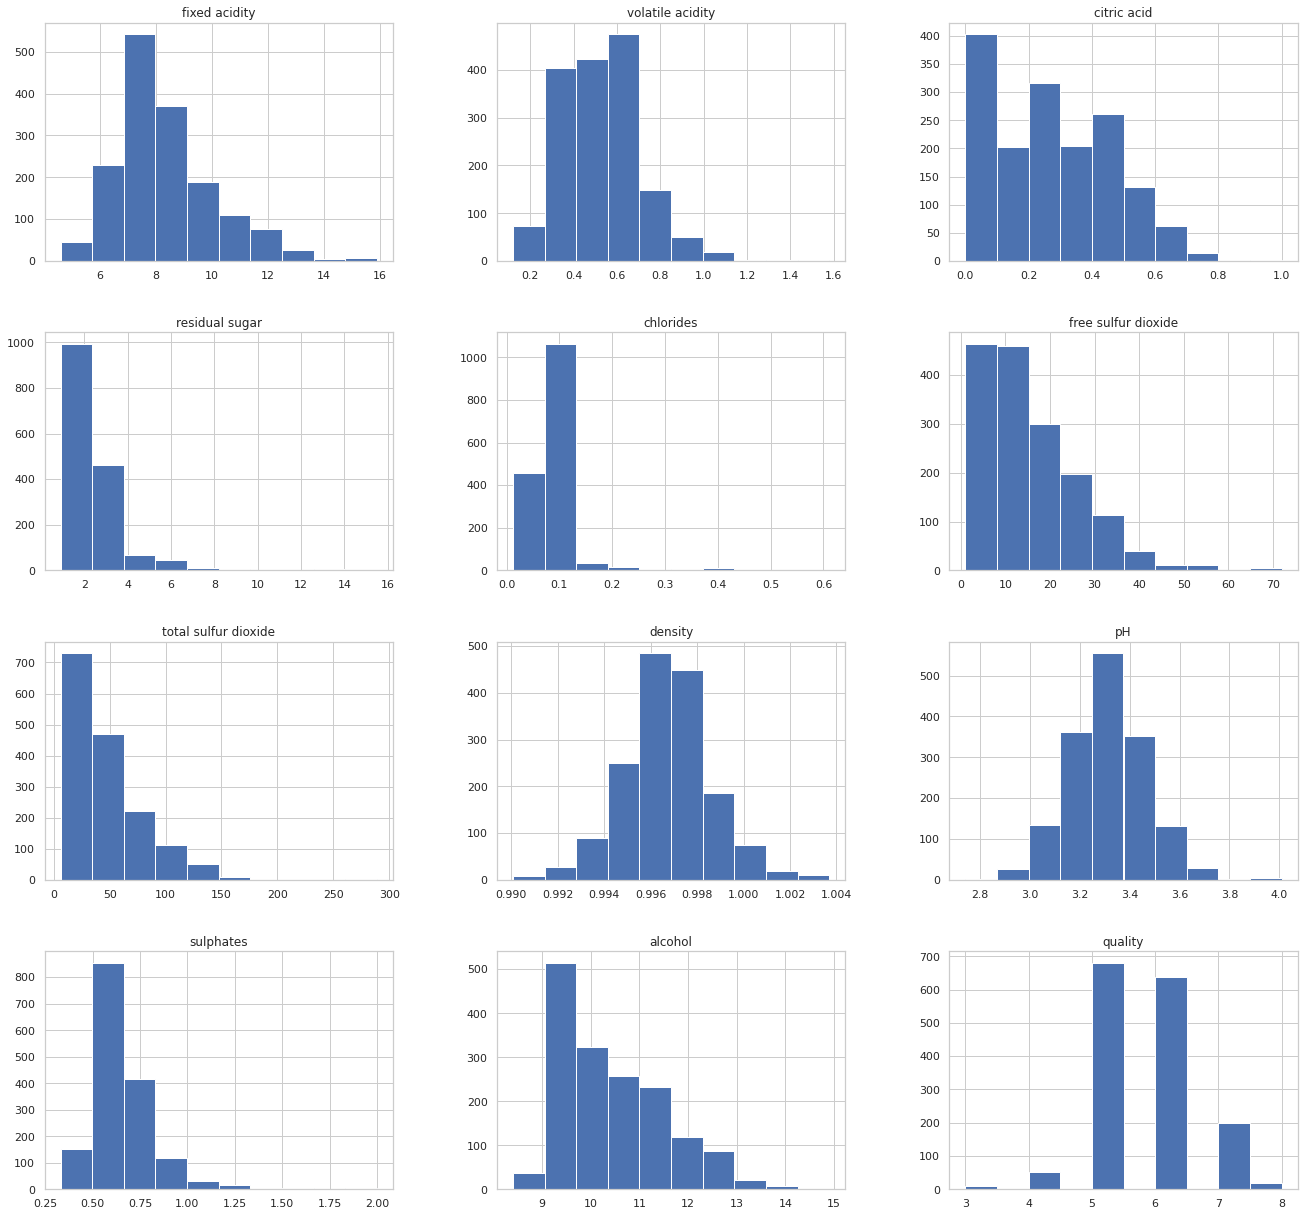

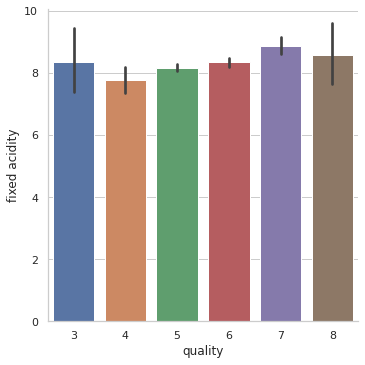

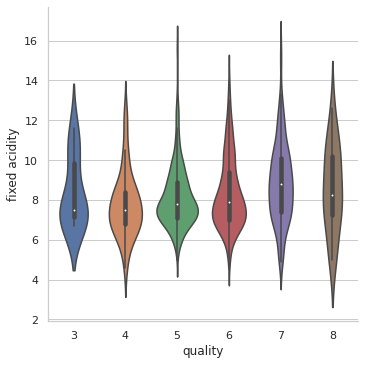

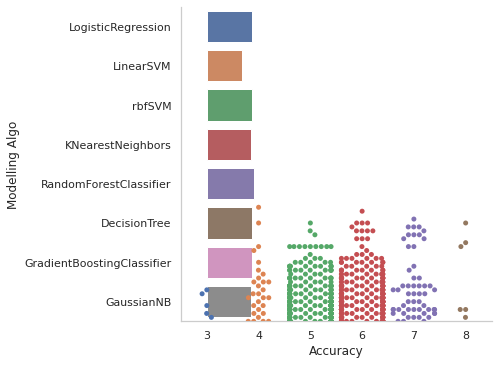

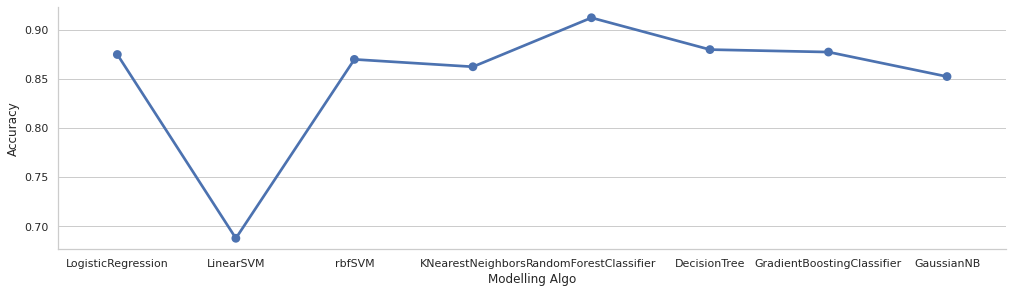

In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

df=pd.read_csv('winequality-red.csv')
df.head()
df.columns

#using histogram
plt.figure(figsize=(10,6))
df.hist(figsize=(20,20))

#Visualisation
def plot(feature_x,target='quality'):
  sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
  sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
  sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

plot('fixed acidity','quality')

#Modelling Algorithms withot feature scaling
bins=(2,6.5,8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)
label_quality=LabelEncoder()
df['quality']=label_quality.fit_transform(df['quality'])
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']
acc=[]
d={}
for model in range(len(models)):
  clf=models[model]
  clf.fit(x_train,y_train)
  pred=clf.predict(x_test)
  acc.append(accuracy_score(pred,y_test))
d={'Modelling Algo':model_names,'Accuracy':acc}
d
acc_frame=pd.DataFrame(d)
acc_frame

sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

#Modelling with Feature Scaling
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#Logistic Regression
params_dict={'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)
clf_lr.best_params_
clf_lr.best_score_
pred=clf_lr.predict(x_test)
print('Accuracy Score LR',accuracy_score(pred,y_test))

#KNN
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)
clf_knn.best_score_
clf_knn.best_params_
pred=clf_knn.predict(x_test)
print('Accuracy Score KNN', accuracy_score(pred,y_test))

#SVM
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print('Accuracy Score SVM',accuracy_score(pred,y_test))

#Random Forest
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print('Accuracy Score RF',accuracy_score(pred,y_test))

#Gradient Boost
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)
pred=clf_gb.predict(x_test)
print('Accuracy Score GB',accuracy_score(pred,y_test))